# Data Wrangle Customer Data & Combine Orders-Product Data

#### 1. Import customers data


In [101]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

## 1. Import Customers data

In [102]:
# import the file and compress the numeric values where possible
path = r'C:\Users\mehak\26-OCT-2020 Instacart Basket Analysis'

dtypes = {'Age': 'int8','n_dependants': 'int8', 'income':'int32'}

df_customers = pd.read_csv(os.path.join(path, '02 Data/Orginal Data/customers.csv'), dtype=dtypes)
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int8  
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int8  
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int32 
dtypes: int32(1), int64(1), int8(2), object(6)
memory usage: 12.2+ MB


In [103]:
df_customers.head()

user_id First Name    Surnam  Gender       STATE  Age date_joined  \
0    26711    Deborah  Esquivel  Female    Missouri   48    1/1/2017   
1    33890   Patricia      Hart  Female  New Mexico   36    1/1/2017   
2    65803    Kenneth    Farley    Male       Idaho   35    1/1/2017   
3   125935   Michelle     Hicks  Female        Iowa   40    1/1/2017   
4   130797        Ann   Gilmore  Female    Maryland   26    1/1/2017   

   n_dependants fam_status  income  
0             3    married  165665  
1             0     single   59285  
2             2    married   99568  
3             0     single   42049  
4             1    married   40374

In [104]:
df_customers.shape

(206209, 10)

In [105]:
df_customers.describe()

user_id            Age   n_dependants         income
count  206209.000000  206209.000000  206209.000000  206209.000000
mean   103105.000000      49.501646       1.499823   94632.852548
std     59527.555167      18.480962       1.118433   42473.786988
min         1.000000      18.000000       0.000000   25903.000000
25%     51553.000000      33.000000       0.000000   59874.000000
50%    103105.000000      49.000000       1.000000   93547.000000
75%    154657.000000      66.000000       3.000000  124244.000000
max    206209.000000      81.000000       3.000000  593901.000000

## 2. Update Column Types and Names

### 2.1 Check & update column data types

In [106]:
# update user_id from int to str
df_customers['user_id'] = df_customers['user_id'].astype('str')
df_customers['date_joined'] = pd.to_datetime(df_customers['date_joined'])
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       206209 non-null  object        
 1   First Name    194950 non-null  object        
 2   Surnam        206209 non-null  object        
 3   Gender        206209 non-null  object        
 4   STATE         206209 non-null  object        
 5   Age           206209 non-null  int8          
 6   date_joined   206209 non-null  datetime64[ns]
 7   n_dependants  206209 non-null  int8          
 8   fam_status    206209 non-null  object        
 9   income        206209 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int8(2), object(6)
memory usage: 12.2+ MB


In [107]:
#code to check for columns having mixed data type
for col in df_customers.columns.tolist():
    weird = (df_customers[[col]].map(type) != df_customers[[col]].iloc[0].apply(type)).any(axis = 1)
    
    if len (df_customers[weird]) > 0:
        print (col)

First Name


In [108]:
# casting first_name as its a mixed type
df_customers['First Name'] = df_customers['First Name'].astype('str')

#### Observations:

First name has mixed types. Casted the columb to string

### 2.2 Update column names

In [109]:
#rename first name, surnam, gender, state and age
df_customers.rename(columns={"First Name":"first_name", "Surnam":"last_name", "Gender":"gender", "STATE":"state",
                            "Age":"age"}, inplace=True)

df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       206209 non-null  object        
 1   first_name    206209 non-null  object        
 2   last_name     206209 non-null  object        
 3   gender        206209 non-null  object        
 4   state         206209 non-null  object        
 5   age           206209 non-null  int8          
 6   date_joined   206209 non-null  datetime64[ns]
 7   n_dependants  206209 non-null  int8          
 8   fam_status    206209 non-null  object        
 9   income        206209 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int8(2), object(6)
memory usage: 12.2+ MB


## 3. Conduct Consistency Checks

### 3.1 Missing Values

In [110]:
# check columns with missing values
df_customers.columns[df_customers.isnull().any()]

Index([], dtype='object')

In [111]:
df_customers['first_name'].isnull().sum()

0

In [112]:
# checking for missing values in income
df_customers['income'].value_counts(dropna=False, sort=True)

income
57192     10
95891     10
95710     10
97532      9
98675      9
          ..
73141      1
71524      1
74408      1
44780      1
148828     1
Name: count, Length: 108012, dtype: int64

#### Observation: 
    1. first_name has 11,259 null has values. No action required
    2. No misisng values in income

### 3.2 Consistency Checks

#### Gender

In [113]:
#check value types and counts of gender

df_customers['gender'].value_counts(dropna=False)

gender
Male      104067
Female    102142
Name: count, dtype: int64

#### Observations:

1. Gender: no change required

#### State

In [114]:
df_customers['state'].nunique()

51

In [115]:
# list states to check for duplicates and error names.
df_customers['state'].value_counts(dropna=False)

state
Florida                 4044
Colorado                4044
Illinois                4044
Alabama                 4044
District of Columbia    4044
Hawaii                  4044
Arizona                 4044
Connecticut             4044
California              4044
Indiana                 4044
Arkansas                4044
Alaska                  4044
Delaware                4044
Iowa                    4044
Idaho                   4044
Georgia                 4044
Wyoming                 4043
Mississippi             4043
Oklahoma                4043
Utah                    4043
New Hampshire           4043
Kentucky                4043
Maryland                4043
Rhode Island            4043
Massachusetts           4043
Michigan                4043
New Jersey              4043
Kansas                  4043
South Dakota            4043
Minnesota               4043
Tennessee               4043
New York                4043
Washington              4043
Louisiana               4043
Montana 

#### Observations:

1. 51 distinct states noted
2. District of Columbia is considered as state hence why its 51 and not 50
3. Customer's are almost equally split between all states (4043, 4044)

#### Age

In [116]:
df_customers['age'].describe()

count    206209.000000
mean         49.501646
std          18.480962
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: age, dtype: float64

In [117]:
#checking for any null values or odd ages
df_customers['age'].value_counts()

age
19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: count, Length: 64, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

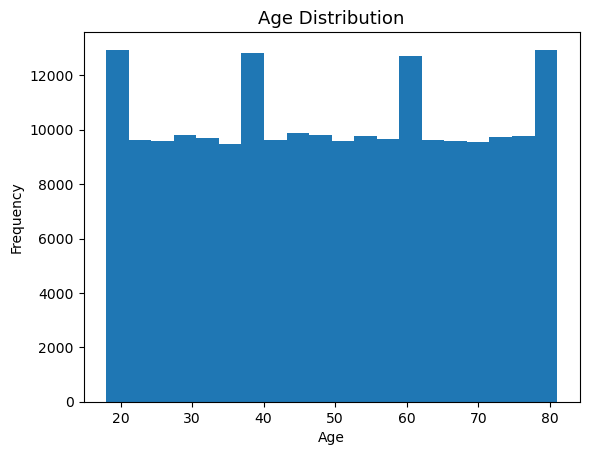

In [118]:
# checking distribution of age
df_customers['age'].plot.hist(bins=20, xlabel='Age')
plt.title('Age Distribution', fontsize=13)

#### Observations:

1. No missing values in age
2. Age min and max appear within expected ranges
3. Age distribution idenfities no outlier. 
4. Age is distribution appears to have peaks for ages 20, 40, 60 and 80

#### Date joined

In [119]:
#min value
df_customers['date_joined'].min()

Timestamp('2017-01-01 00:00:00')

In [120]:
#max value
df_customers['date_joined'].max()

Timestamp('2020-04-01 00:00:00')

In [121]:
#value counts
df_customers['date_joined'].value_counts(dropna=False, sort=False)

date_joined
2017-01-01    159
2017-01-02    154
2017-01-03    169
2017-01-04    188
2017-01-05    177
             ... 
2020-03-28    197
2020-03-29    171
2020-03-30    165
2020-03-31    149
2020-04-01    169
Name: count, Length: 1187, dtype: int64

#### Observations:

1. Date joined dates are from 2017-01-01 to 2020-04-01
2. No consistency or missing values in date_joined

#### n_dependants

In [122]:
# value counts of n_dependants
df_customers['n_dependants'].value_counts(dropna=False)

n_dependants
0    51602
3    51594
1    51531
2    51482
Name: count, dtype: int64

Text(0.5, 1.0, '# Dependants Distribution')

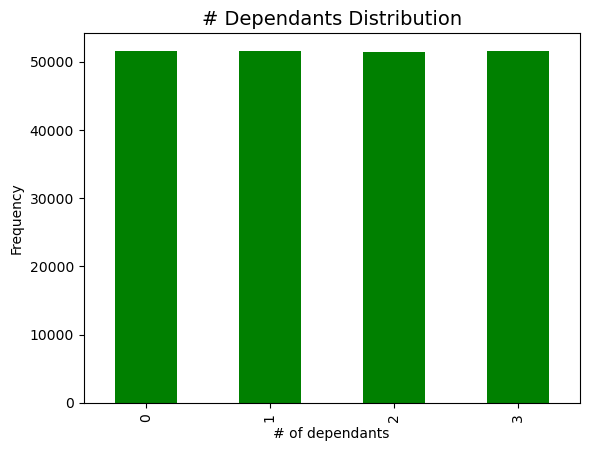

In [123]:
df_customers['n_dependants'].value_counts(dropna=True).sort_index().plot.bar(color=['green'], ylabel='Frequency', 
                                xlabel='# of dependants')
plt.title('# Dependants Distribution', fontsize=14)

#### Observations

1. No missing or inconsistent values in n_dependants
2. dependants range from 0-4. 4 value types
3. Number of dependants are equally distributed.

#### fam_status

In [124]:
df_customers['fam_status'].value_counts(dropna=False)

fam_status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

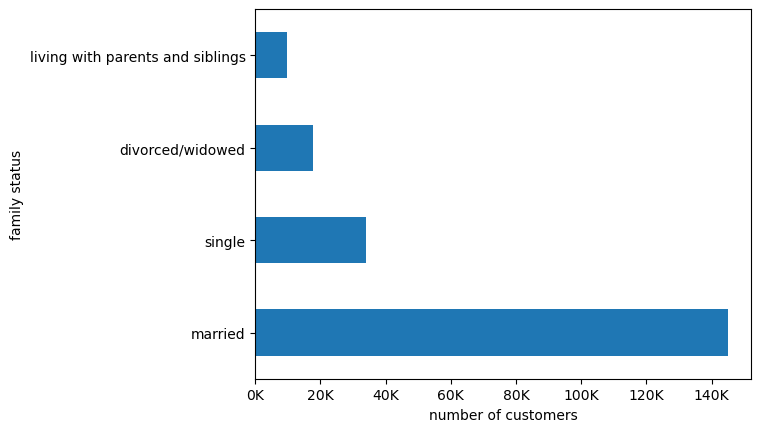

In [125]:
#plot bar chart to see the distribution of the fam_status values
barh_fam_status =  df_customers['fam_status'].value_counts(dropna=False).plot.barh(
    xlabel="number of customers", ylabel='family status')
barh_fam_status.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y,pos: format(y/1000,'1.0f')+'K'))

#### Income

In [126]:
df_customers['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

In [127]:
df_customers['income'].median()

93547.0

/Users/mehak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mehak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='income', ylabel='income'>

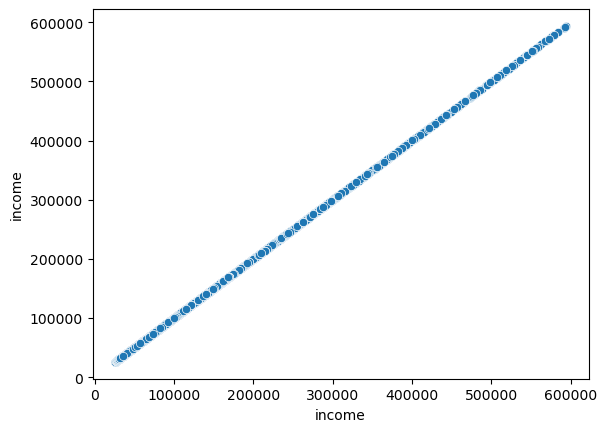

In [128]:
# scatterplot to identify any outliers in income column
sns.scatterplot(x="income", y="income", data=df_customers)

<Axes: ylabel='Frequency'>

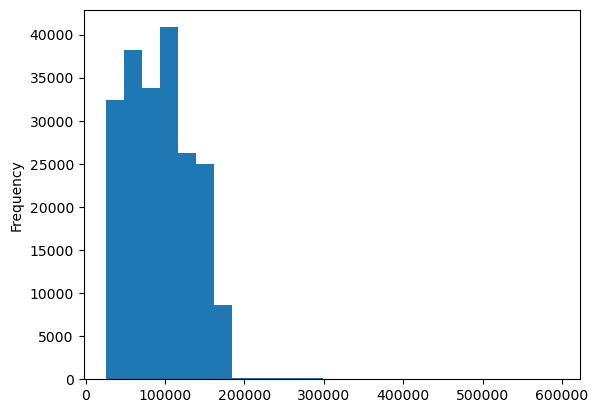

In [129]:
bins = [100000,200000,300000,400000, 500000]
df_customers['income'].plot.hist(bins=25)

In [130]:
df_check_income = df_customers[df_customers['income'] > 300000]
df_check_income.sort_values(by='income', ascending=True, )

user_id first_name   last_name  gender           state  age  \
979     200930    Charles     Nichols    Male  South Carolina   60   
86870    71498     Gloria    Stafford  Female        Virginia   69   
138764  151552       Mark        Neal    Male        Oklahoma   71   
47787   205650     Jeremy        Vang    Male        Kentucky   62   
58395    77541   Kimberly    Anderson  Female         Montana   25   
...        ...        ...         ...     ...             ...  ...   
167037  189861     Pamela      Jordan  Female    Pennsylvania   47   
111950  187680  Catherine      Church  Female         Wyoming   43   
81583   103702    Kathryn  Mclaughlin  Female       Louisiana   55   
202655   98580        nan   Patterson    Male      Washington   43   
21726    58596     Thomas       Cohen    Male      Washington   75   

       date_joined  n_dependants        fam_status  income  
979     2017-01-06             1           married  300913  
86870   2018-05-14             3           married  302234  
138764  2019-03-11             1           married  302363  
47787   2017-10-02             0  divorced/widowed  302526  
58395   2017-12-03             2           married  302561  
...            ...           ...               ...     ...  
167037  2019-08-21             0            single  584097  
111950  2018-10-07             2           married  590790  
81583   2018-04-14             3           married  591089  
202655  2020-03-12             2           married  592409  
21726   2017-05-06             2           married  593901  

[382 rows x 10 columns]

#### Observations:

1. Income's distribution is right skewed where by mean and median are between 93,500 - 94,700
2. There are valid incomes above 300,000, going upto 593,901
3. No outliers found

## 4. Duplicates Checks

In [131]:
df_dups = df_customers[df_customers.duplicated()]
df_dups.shape

(0, 10)

#### Observations: No duplicates

## 5. Combine Orders-Product with Customers

### 5.1 Import orders-product pickle file

In [132]:
# load the orders_product_cust_types pickle file to dataframe
df_ords_prods = pd.read_pickle(os.path.join(path,'02 Data/Prepared Data/orders_product_cust_types.pkl'))
df_ords_prods.shape

(32404859, 24)

In [133]:
df_ords_prods['prices'] = df_ords_prods['prices'].astype('float32')

In [134]:
df_ords_prods['mean_expenses'] = df_ords_prods['prices'].astype('float32')

In [135]:
# checking for _merge column
df_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32404859 entries, 0 to 11011801
Data columns (total 24 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    object  
 1   user_id                     object  
 2   number_of_orders            int8    
 3   orders_days_of_week         int8    
 4   order_hour_of_day           int8    
 5   days_since_prior_order      float32 
 6   product_id                  object  
 7   add_to_cart_order           int32   
 8   reordered                   int8    
 9   product_name                object  
 10  aisle_id                    int16   
 11  department_id               int8    
 12  prices                      float32 
 13  _merge                      category
 14  price_range_loc             object  
 15  busiest_day                 object  
 16  busy_slow_days              object  
 17  busiest_hours               object  
 18  max_orders                  int8    
 19  loy

In [136]:
# drop the _merge column in df_ords_prod prior to next merge as there is conflict

df_ords_prods.drop(columns=['_merge'], inplace=True)
df_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32404859 entries, 0 to 11011801
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    object 
 1   user_id                     object 
 2   number_of_orders            int8   
 3   orders_days_of_week         int8   
 4   order_hour_of_day           int8   
 5   days_since_prior_order      float32
 6   product_id                  object 
 7   add_to_cart_order           int32  
 8   reordered                   int8   
 9   product_name                object 
 10  aisle_id                    int16  
 11  department_id               int8   
 12  prices                      float32
 13  price_range_loc             object 
 14  busiest_day                 object 
 15  busy_slow_days              object 
 16  busiest_hours               object 
 17  max_orders                  int8   
 18  loyalty_flag                object 
 19  mean_expenses           

In [137]:
# merge ords_prods withc customers using user_id
df_ords_prods_customers_left = df_ords_prods.merge(df_customers, on=['user_id'], indicator=True)

In [138]:
df_ords_prods_customers_left['_merge'].value_counts(dropna=False)

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [139]:
df_ords_prods_customers_left.shape

(32404859, 33)

In [145]:
df_ords_prods_customers_left.drop(columns=['_merge'], inplace=True)

In [146]:
df_ords_prods_customers_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   order_id                    object        
 1   user_id                     object        
 2   number_of_orders            int8          
 3   orders_days_of_week         int8          
 4   order_hour_of_day           int8          
 5   days_since_prior_order      float32       
 6   product_id                  object        
 7   add_to_cart_order           int32         
 8   reordered                   int8          
 9   product_name                object        
 10  aisle_id                    int16         
 11  department_id               int8          
 12  prices                      float32       
 13  price_range_loc             object        
 14  busiest_day                 object        
 15  busy_slow_days              object        
 16  busiest_hours   

## 5. Export Customer File to PKL

In [147]:
#exporting file
df_ords_prods_customers_left.to_pickle(os.path.join(path,'02 Data/Prepared Data/ords_prods_customers_left.pkl'))